In [73]:
import numpy as np
from matplotlib import pyplot as plt

## Motivation

Often in physics and engineering coursework, we are asked to determine the state of a system given the parameters of the system. For example, the relationship between the force exerted by a linear spring, $F$, and the displacement of the spring from its natural length, $x$, is usually represented by the model $$F = kx \text{ ,}$$ where $k$ is the spring stiffness. We are then asked to compute the force for a given $k$ and $x$ value. However in practice, the stiffness and in general, most of the parameters of a system, are not known a priori. Instead, we are usually presented with data points about how the system has behaved in the past. For our spring example, we may be given $(x, F)$ data pairs that have been previously recorded from an experiment. Ideally, all these data points would lie exactly on a line going through the origin (since there is no force at zero displacement). We could then measure the slope of this line and get our stiffness value for k. However, practical data usually has some measurement noise because of sensor inaccuracy, measurement error, or a variety of other reasons. Figure 13.1 shows an example of what data might look like for a simple spring experiment. This chapter teaches methods of ﬁnding the “most likely” model parameters given a set of data; for example, how to ﬁnd the spring stiffness in our mock experiment.  By the end of this chapter you should understand how these methods choose model parameters, the importance of choosing the correct model, and how to implement these methods in MATLAB.


## 13.1 Least Squares RegressionProblem Statement

Given a set of independent data points $x_i$ and dependent data points $y_i,i = 1,...,m$, we would like to ﬁnd an **estimation function**, $\hat{y}(x)$, that describes the data as well as possible. Note that $\hat{y}$ can be a function of several variables, but for the sake of this discussion, we restrict the domain of $\hat{y}$ to be a single variable. In least squares regression, the estimation function must be a linear combination of **basis functions**, $f_i(x)$. That is, the estimation function must be of the form
$$ \hat{y}(x) = \sum_{i = 1}^{n} α_i f_i(x)$$
The scalars $α_i$ are referred to as the **parameters** of the estimation function, and each basis function must be linearly independent from the others. In other words, in the proper “functional space” no basis function should be expressible as a linear combination of the other functions. Note: In general, there are signiﬁcantly more data points, $m$, than basis functions, $n$ (i.e., $m >> n$).


...

TRY IT! For the matrix $A$ and vector $y$, show that $x = np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(y)$ and $x = np.linalg.pinv(A).dot(y)$ produce the same result for $x$

In [74]:
A = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([[4], [1], [2]])

x = np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(y)
print(x)

x = np.linalg.pinv(A).dot(y)
print(x)

#to my knowledge, there is no equivalent of A\y in numpy

[[-4.33333333]
 [ 3.83333333]]
[[-4.33333333]
 [ 3.83333333]]


[[ 1.45321879]
 [ 1.00422436]]


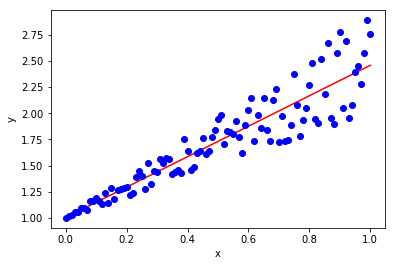

In [86]:
x = np.linspace(0,1,101).reshape((101, 1))
rand_by_x = np.multiply(x, np.random.random(len(x)).reshape((101, 1)))
y = np.add(np.add( np.ones(len(x)).reshape((101, 1)), x ) , rand_by_x )
A = np.hstack([x, np.ones(len(x)).reshape((101, 1))])
alpha = np.linalg.inv(np.dot(A.T, A)).dot(A.T).dot(y)
print(alpha)

plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.plot(x, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()